In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

import numpy as np
import librosa
import IPython.display as ipd
from matplotlib import pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
device = 'cpu'

In [5]:
from birds_utils import mel_spectrogram_pytorch, get_bin_audio

In [14]:
window_size = 2048
duration = 5
sr = 22050
n_classes = 264
model = mel_spectrogram_pytorch(n_mels=256).to(device)

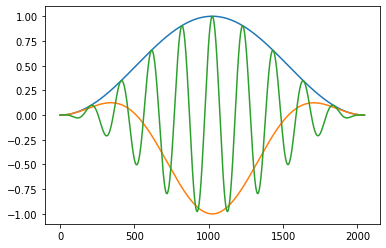

In [15]:
plt.plot(model.cos.weight.data[0, 0, :])
plt.plot(model.cos.weight.data[1, 0, :])
plt.plot(model.cos.weight.data[10, 0, :])

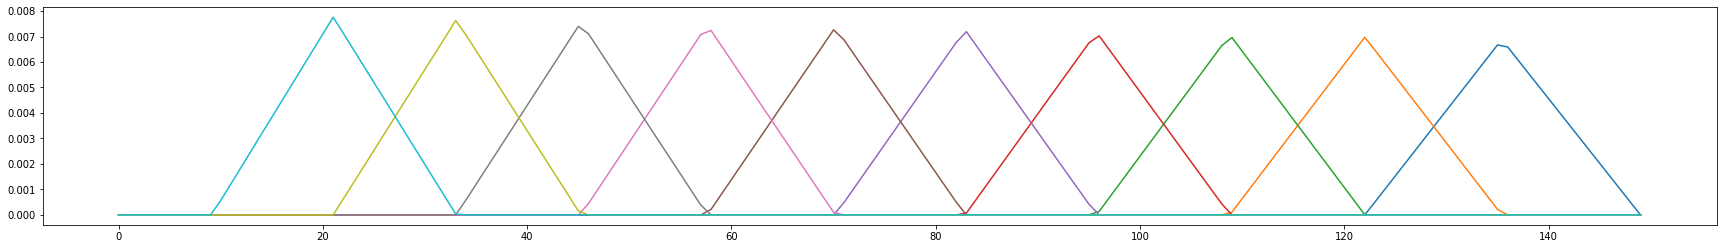

In [16]:
plt.figure(figsize=(30, 4))
for N in range(10):
    plt.plot(model.mel_filter.weight.data[-(N+1), :, 0][-150:] + model.mel_filter.bias.data[-(N+1)])


In [17]:
file_to_test = './dataset/bin_22050_librosa/rewbla/XC173883.mp3.bin'

In [18]:
audio_chunk = get_bin_audio(file_to_test)[:duration*sr]

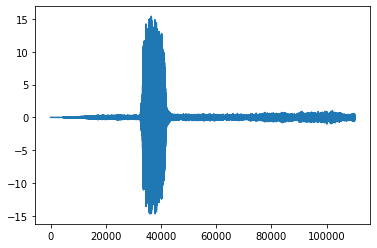

In [19]:
plt.plot(audio_chunk)

In [40]:
batches = 32
audio_batch = np.vstack(batches*[audio_chunk])
audio_batch.shape

(32, 110250)

In [46]:
%%time
model_spectrograms = model(torch.from_numpy(audio_batch.reshape(batches, 1, -1)).float())

CPU times: user 1.75 s, sys: 142 ms, total: 1.89 s
Wall time: 376 ms


In [47]:
model_spectrograms.shape

torch.Size([32, 256, 423])

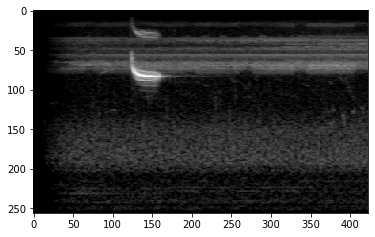

In [51]:
plt.imshow(np.flipud(model_spectrograms[0].detach()), cmap='gray')

In [52]:
%%time
librosa_spectrograms = []
for audio_chunk_from_batch in audio_batch:
    librosa_spectrogram = librosa.feature.melspectrogram(audio_chunk_from_batch, n_mels=256, n_fft=2048, hop_length=256)
    librosa_spectrograms.append(librosa.power_to_db(librosa_spectrogram))
librosa_spectrograms = np.array(librosa_spectrograms)

CPU times: user 2.17 s, sys: 0 ns, total: 2.17 s
Wall time: 386 ms


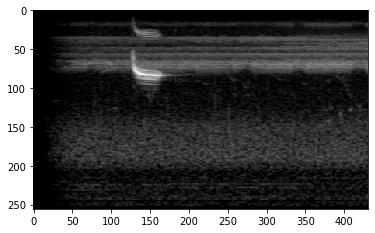

In [50]:
plt.imshow(np.flipud(librosa_spectrograms[0]), cmap='gray')

In [23]:
ipd.Audio(audio_chunk, rate=sr)